In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [2]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Load Dataset

In [4]:
# Load the dataset
df = pd.read_csv('../data/raw/cirrhosis.csv')

# Quick preview
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}, Total Features: {df.shape[1]}")
df.head(10)

Dataset Shape: (418, 20)
Total Records: 418, Total Features: 20


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


## 2. Dataset Overview & Structure

In [5]:
# Dataset info
print("=" * 50)
print("DATASET INFO")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("DATA TYPES SUMMARY")
print("=" * 50)
print(df.dtypes.value_counts())

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 1

In [6]:
# Statistical summary for numerical features
print("=" * 50)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("=" * 50)
df.describe().T

STATISTICAL SUMMARY - NUMERICAL FEATURES


,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [7]:
# Categorical features summary
print("=" * 50)
print("CATEGORICAL FEATURES SUMMARY")
print("=" * 50)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

CATEGORICAL FEATURES SUMMARY

Status:
Status
C     232
D     161
CL     25
Name: count, dtype: int64

Drug:
Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

Sex:
Sex
F    374
M     44
Name: count, dtype: int64

Ascites:
Ascites
N    288
Y     24
Name: count, dtype: int64

Hepatomegaly:
Hepatomegaly
Y    160
N    152
Name: count, dtype: int64

Spiders:
Spiders
N    222
Y     90
Name: count, dtype: int64

Edema:
Edema
N    354
S     44
Y     20
Name: count, dtype: int64


## 3. Missing Values Analysis

MISSING VALUES ANALYSIS
               Missing Values  Percentage
Tryglicerides             136   32.535885
Cholesterol               134   32.057416
Copper                    108   25.837321
Drug                      106   25.358852
Ascites                   106   25.358852
Hepatomegaly              106   25.358852
Spiders                   106   25.358852
SGOT                      106   25.358852
Alk_Phos                  106   25.358852
Platelets                  11    2.631579
Stage                       6    1.435407
Prothrombin                 2    0.478469


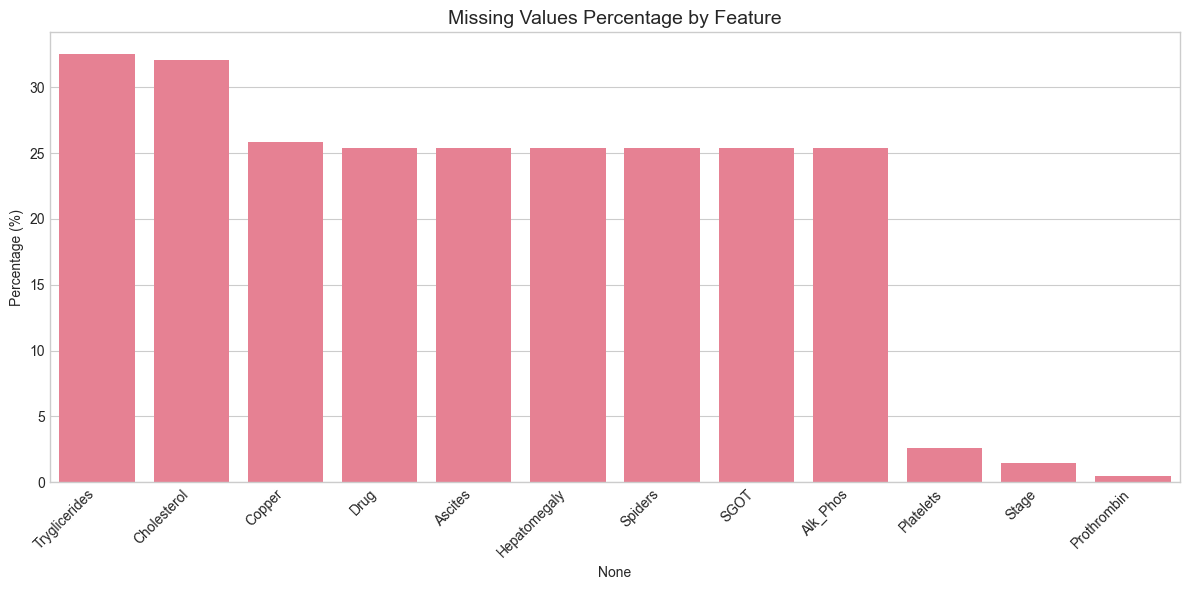

In [8]:
# Missing values analysis
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print("=" * 50)
print("MISSING VALUES ANALYSIS")
print("=" * 50)
print(missing_df[missing_df['Missing Values'] > 0])

# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 6))
missing_cols = missing_df[missing_df['Missing Values'] > 0]
if len(missing_cols) > 0:
    sns.barplot(x=missing_cols.index, y='Percentage', data=missing_cols, ax=ax)
    plt.xticks(rotation=45, ha='right')
    plt.title('Missing Values Percentage by Feature', fontsize=14)
    plt.ylabel('Percentage (%)')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found in the dataset!")

## 4. Target Variable Analysis (Status)

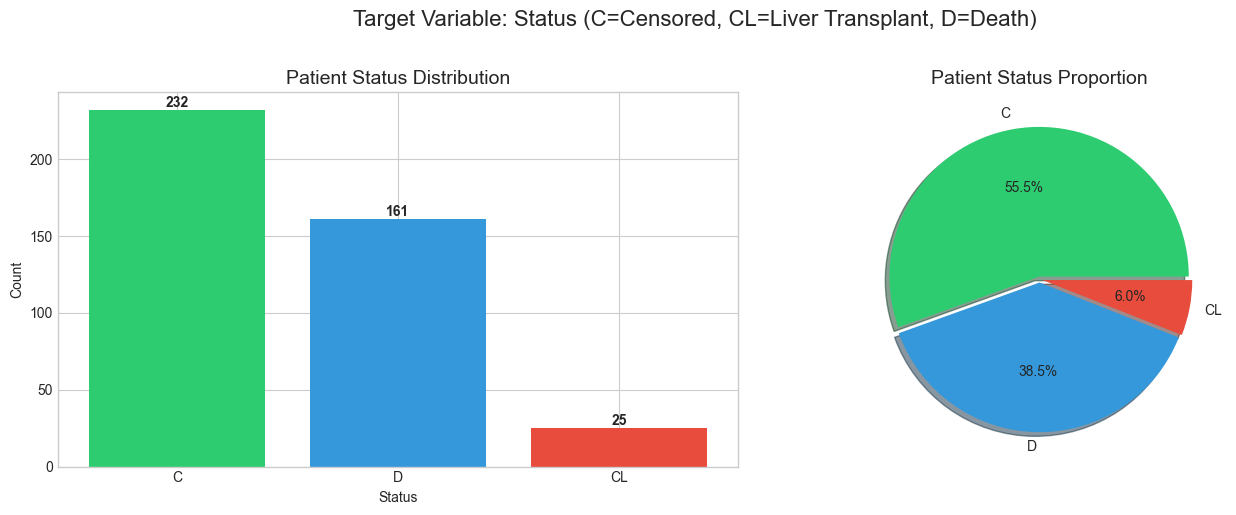


Status Legend:
C  = Censored (alive at end of study)
CL = Censored due to liver transplant
D  = Death


In [9]:
# Target variable distribution (Status: C=Censored, CL=Censored due to liver transplant, D=Death)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
status_counts = df['Status'].value_counts()
colors = ['#2ecc71', '#3498db', '#e74c3c']
axes[0].bar(status_counts.index, status_counts.values, color=colors)
axes[0].set_title('Patient Status Distribution', fontsize=14)
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')
for i, v in enumerate(status_counts.values):
    axes[0].text(i, v + 2, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
            colors=colors, explode=[0.02]*len(status_counts), shadow=True)
axes[1].set_title('Patient Status Proportion', fontsize=14)

plt.suptitle('Target Variable: Status (C=Censored, CL=Liver Transplant, D=Death)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\nStatus Legend:")
print("C  = Censored (alive at end of study)")
print("CL = Censored due to liver transplant")
print("D  = Death")

## 5. Numerical Features Distribution

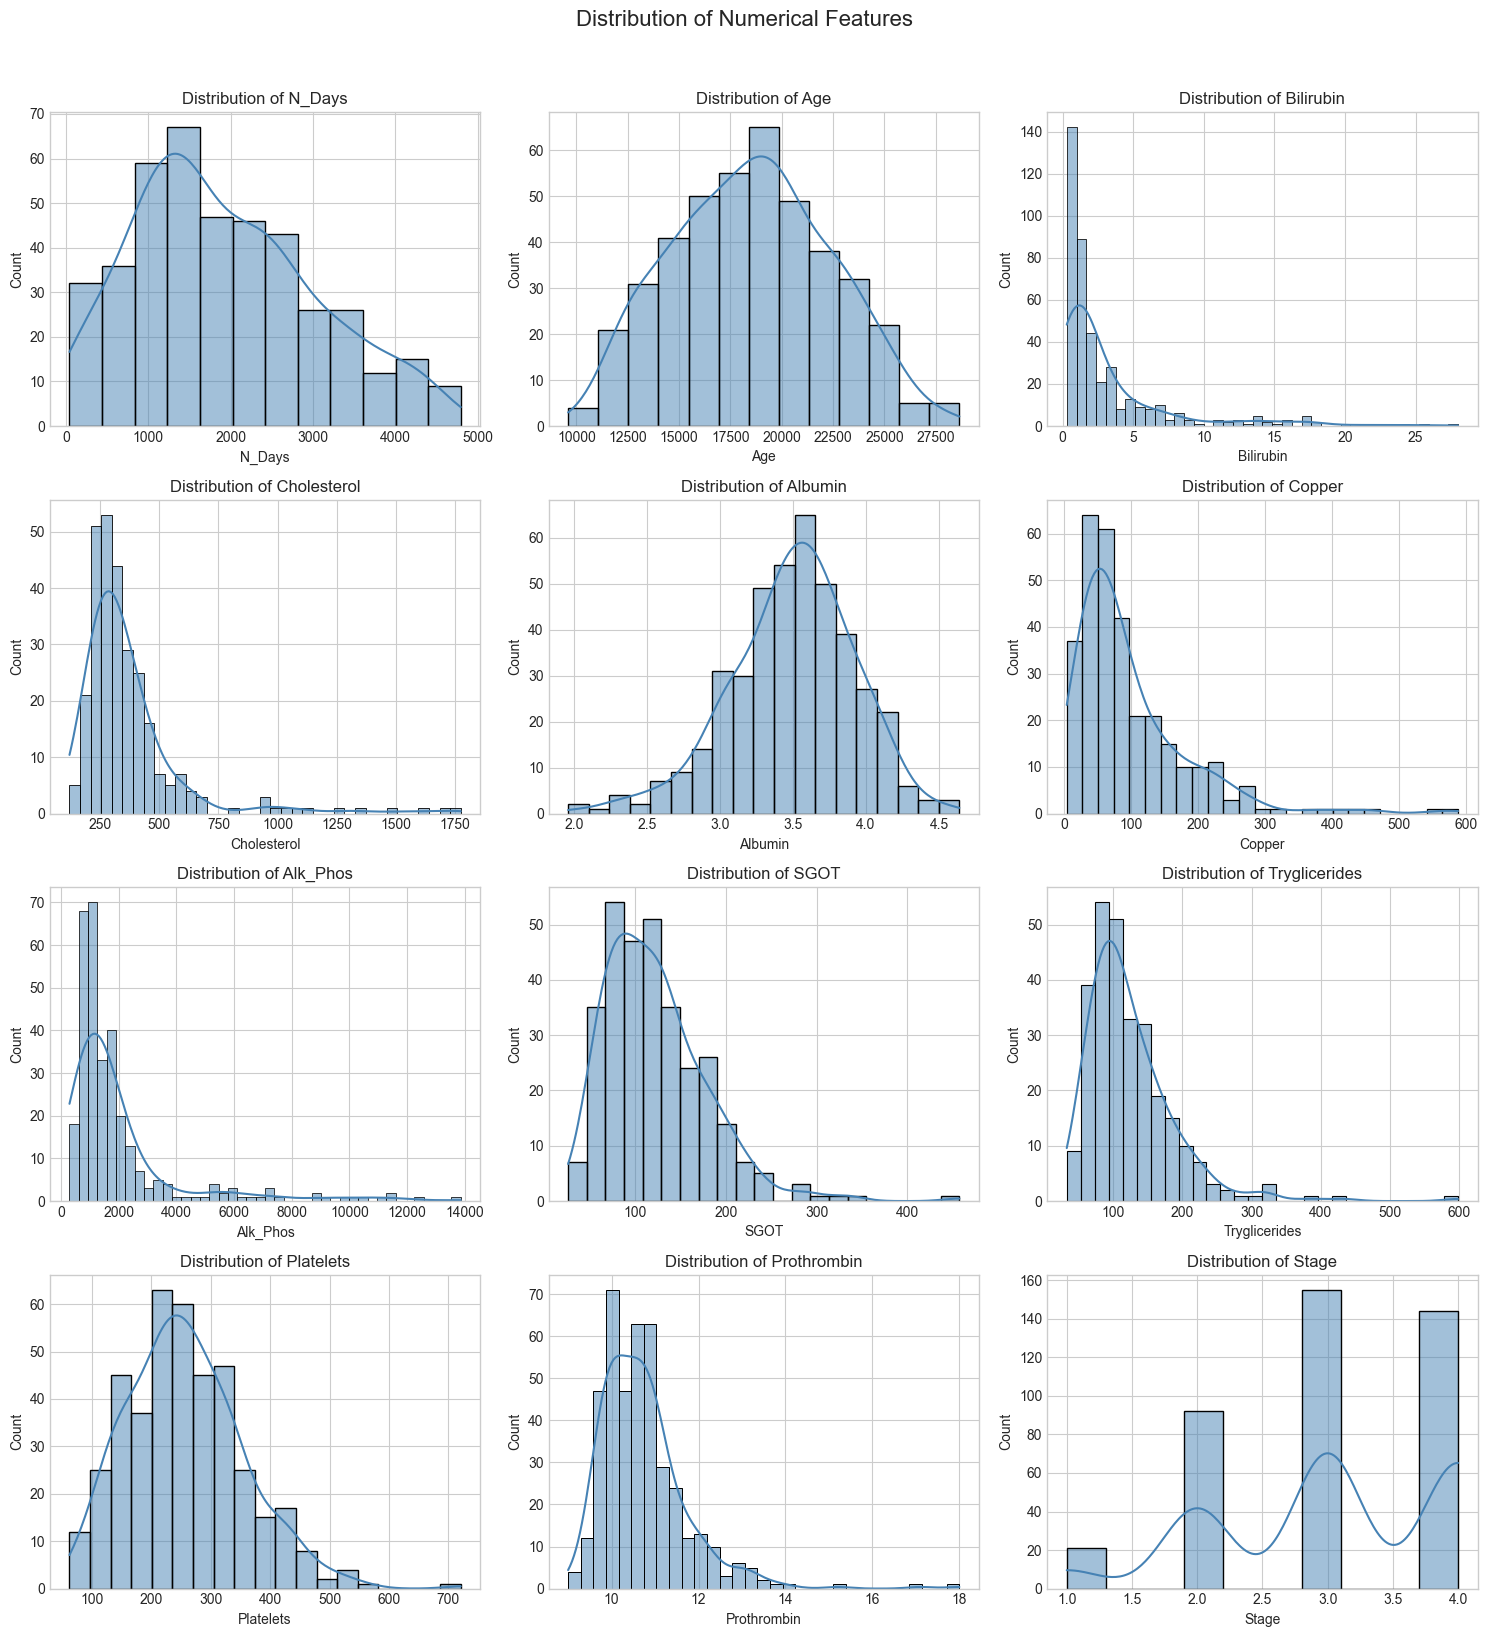

In [10]:
# Numerical features distribution
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'ID']  # Exclude ID

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12)
    axes[idx].set_xlabel(col)
    
# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 6. Box Plots for Outlier Detection

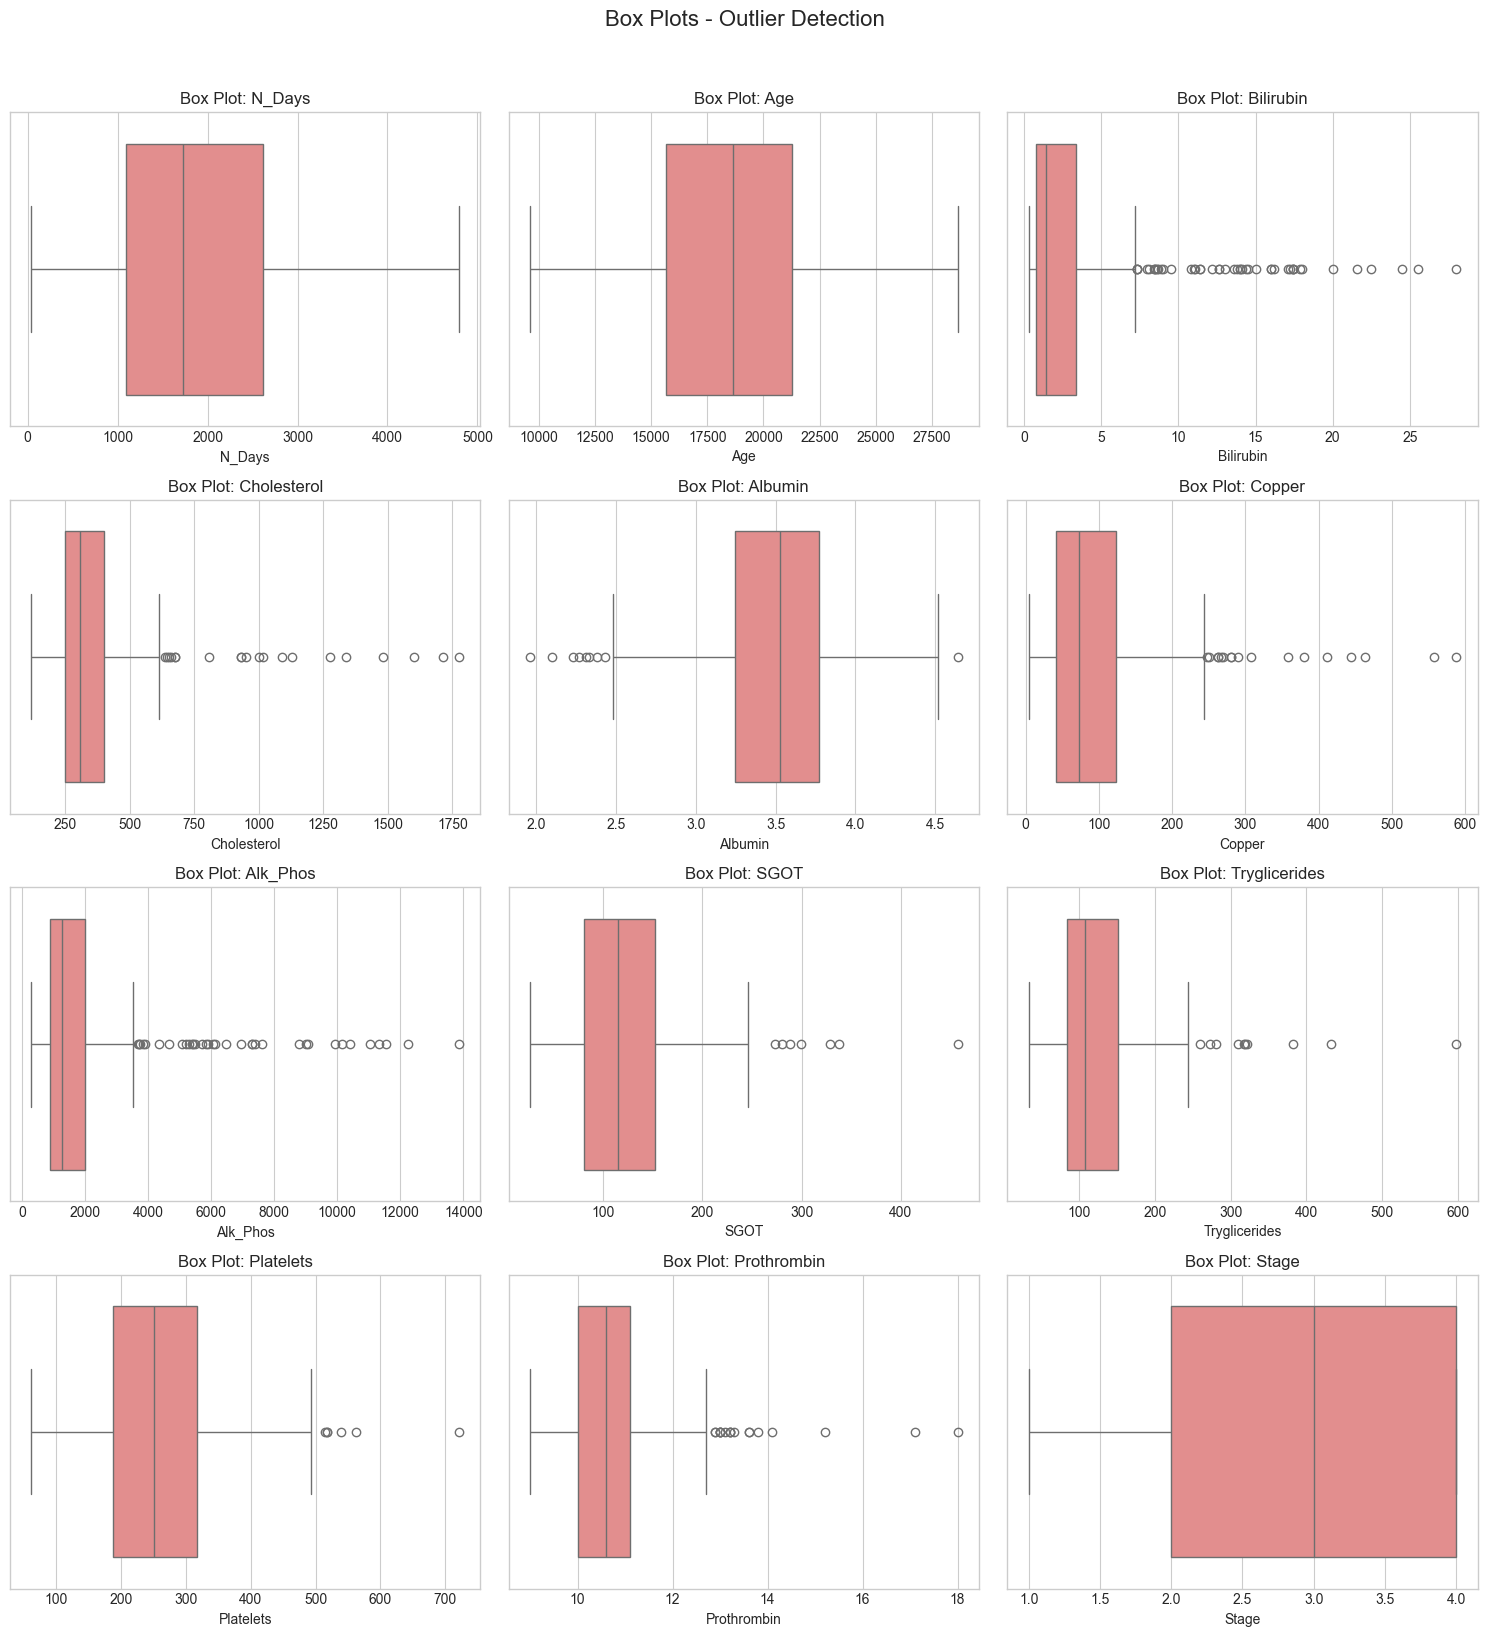

In [11]:
# Box plots for outlier detection
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'Box Plot: {col}', fontsize=12)
    
# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Box Plots - Outlier Detection', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 7. Categorical Features Distribution

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\4065492135.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx], palette='viridis')
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\4065492135.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx], palette='viridis')
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\4065492135.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=v

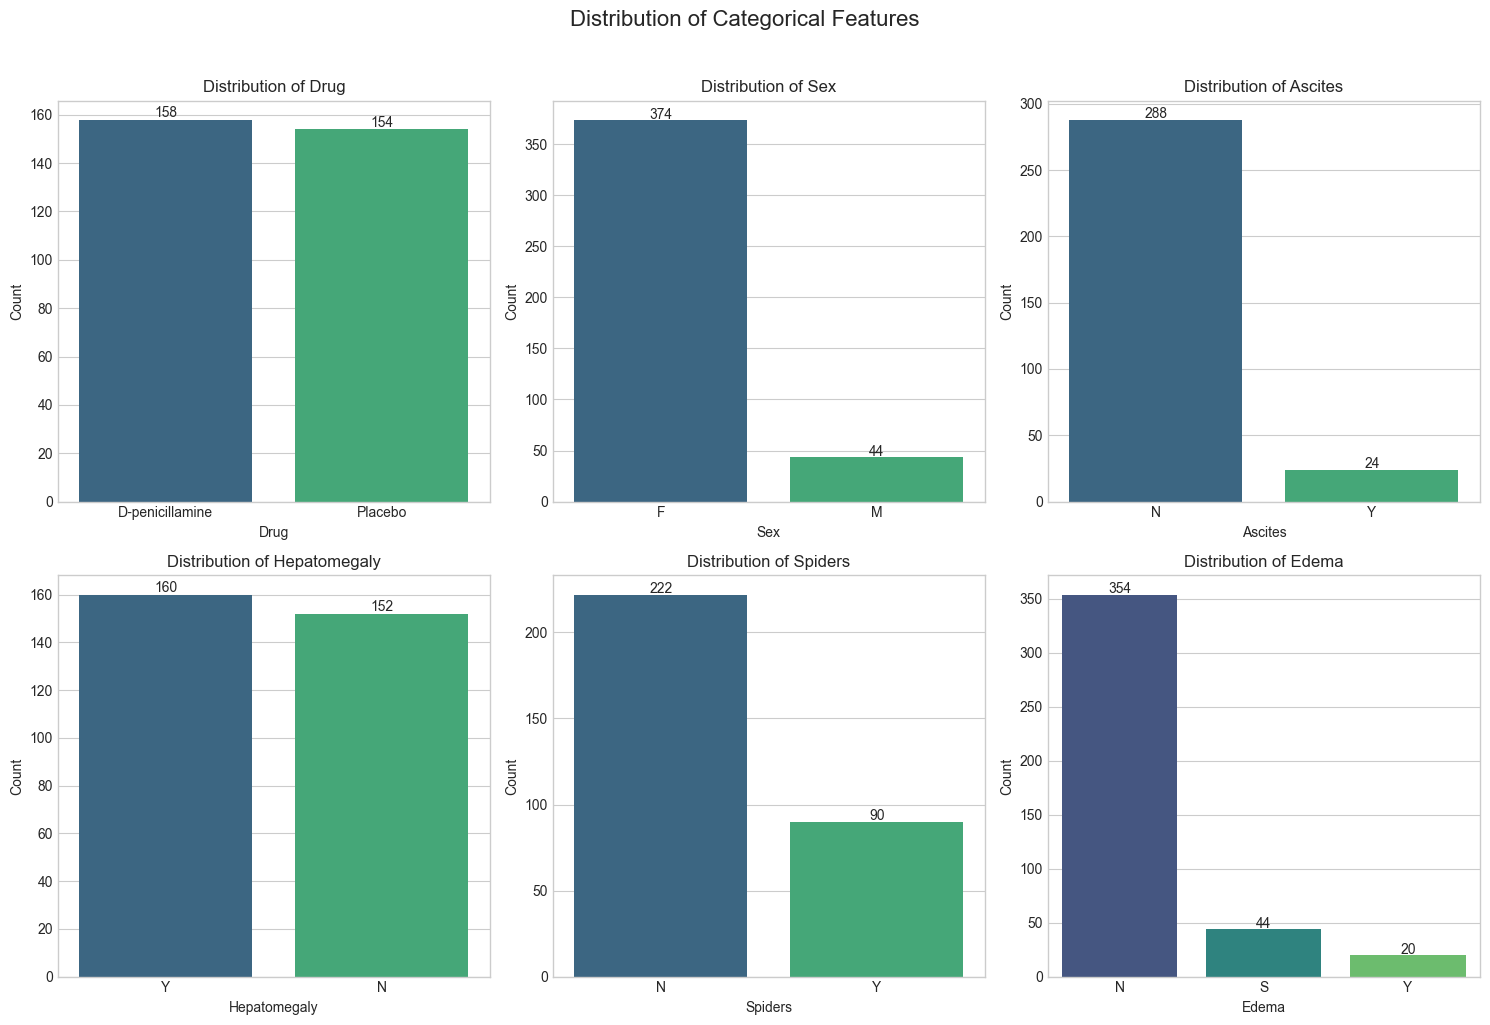

In [12]:
# Categorical features distribution
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Status']  # Exclude target

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx], palette='viridis')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        for i, v in enumerate(value_counts.values):
            axes[idx].text(i, v + 1, str(v), ha='center', fontsize=10)

# Hide empty subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Distribution of Categorical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 8. Correlation Analysis

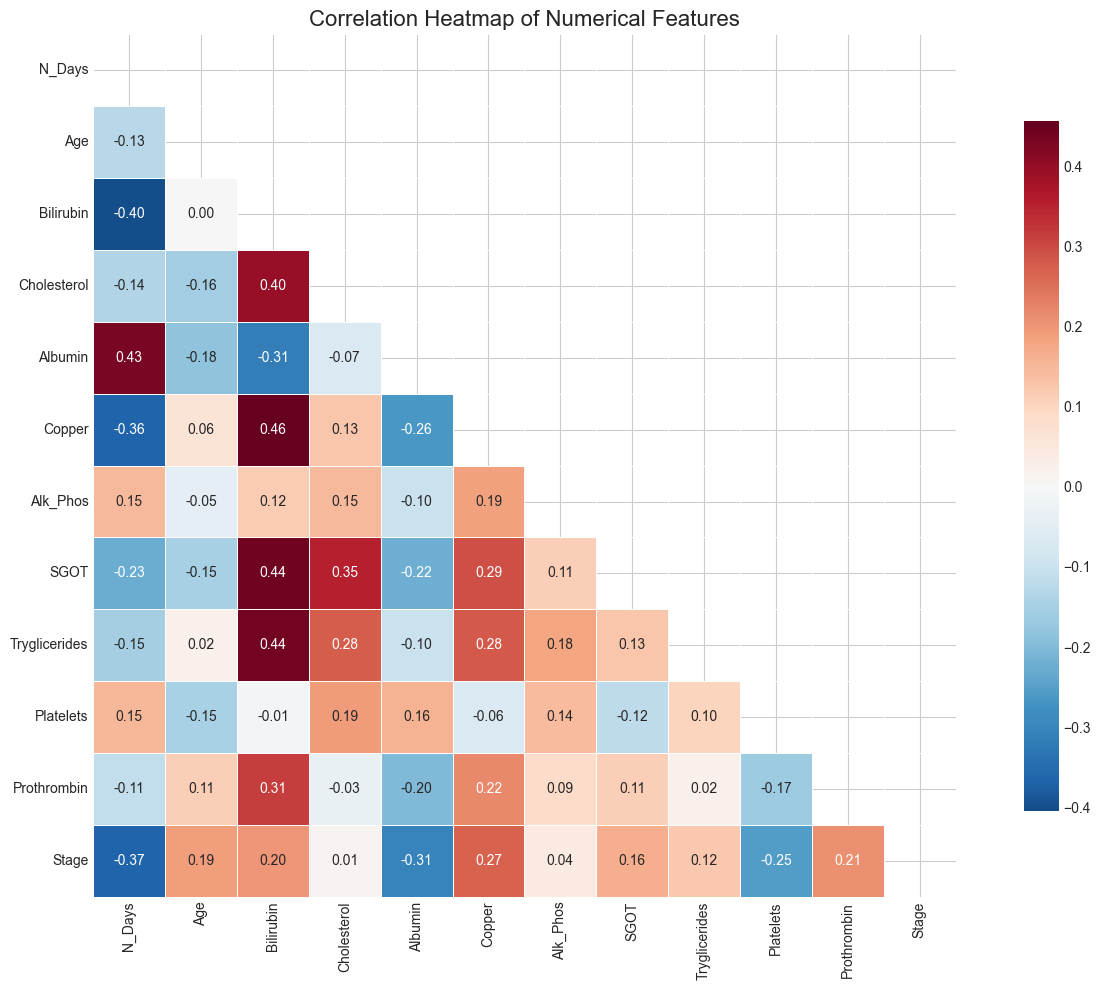


TOP POSITIVE CORRELATIONS
Copper         Bilirubin        0.456918
Bilirubin      Copper           0.456918
SGOT           Bilirubin        0.441730
Bilirubin      SGOT             0.441730
Tryglicerides  Bilirubin        0.436748
Bilirubin      Tryglicerides    0.436748
N_Days         Albumin          0.430829
Albumin        N_Days           0.430829
Cholesterol    Bilirubin        0.397129
Bilirubin      Cholesterol      0.397129
dtype: float64

TOP NEGATIVE CORRELATIONS
Stage      Albumin     -0.305296
Albumin    Stage       -0.305296
           Bilirubin   -0.314177
Bilirubin  Albumin     -0.314177
N_Days     Copper      -0.364809
Copper     N_Days      -0.364809
N_Days     Stage       -0.366193
Stage      N_Days      -0.366193
Bilirubin  N_Days      -0.403953
N_Days     Bilirubin   -0.403953
dtype: float64


In [13]:
# Correlation heatmap
numerical_df = df.select_dtypes(include=[np.number]).drop(columns=['ID'], errors='ignore')

plt.figure(figsize=(14, 10))
correlation_matrix = numerical_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, linewidths=0.5,
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Top correlations
print("\n" + "=" * 50)
print("TOP POSITIVE CORRELATIONS")
print("=" * 50)
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Remove self-correlations
print(corr_pairs.head(10))

print("\n" + "=" * 50)
print("TOP NEGATIVE CORRELATIONS")
print("=" * 50)
print(corr_pairs.tail(10))

## 9. Feature Analysis by Status (Target Variable)

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\4157574297.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y=col, ax=axes[idx], palette='Set2')
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\4157574297.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y=col, ax=axes[idx], palette='Set2')
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\4157574297.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y=col, ax=axes[idx], palette='Set2')
C:\Users\H

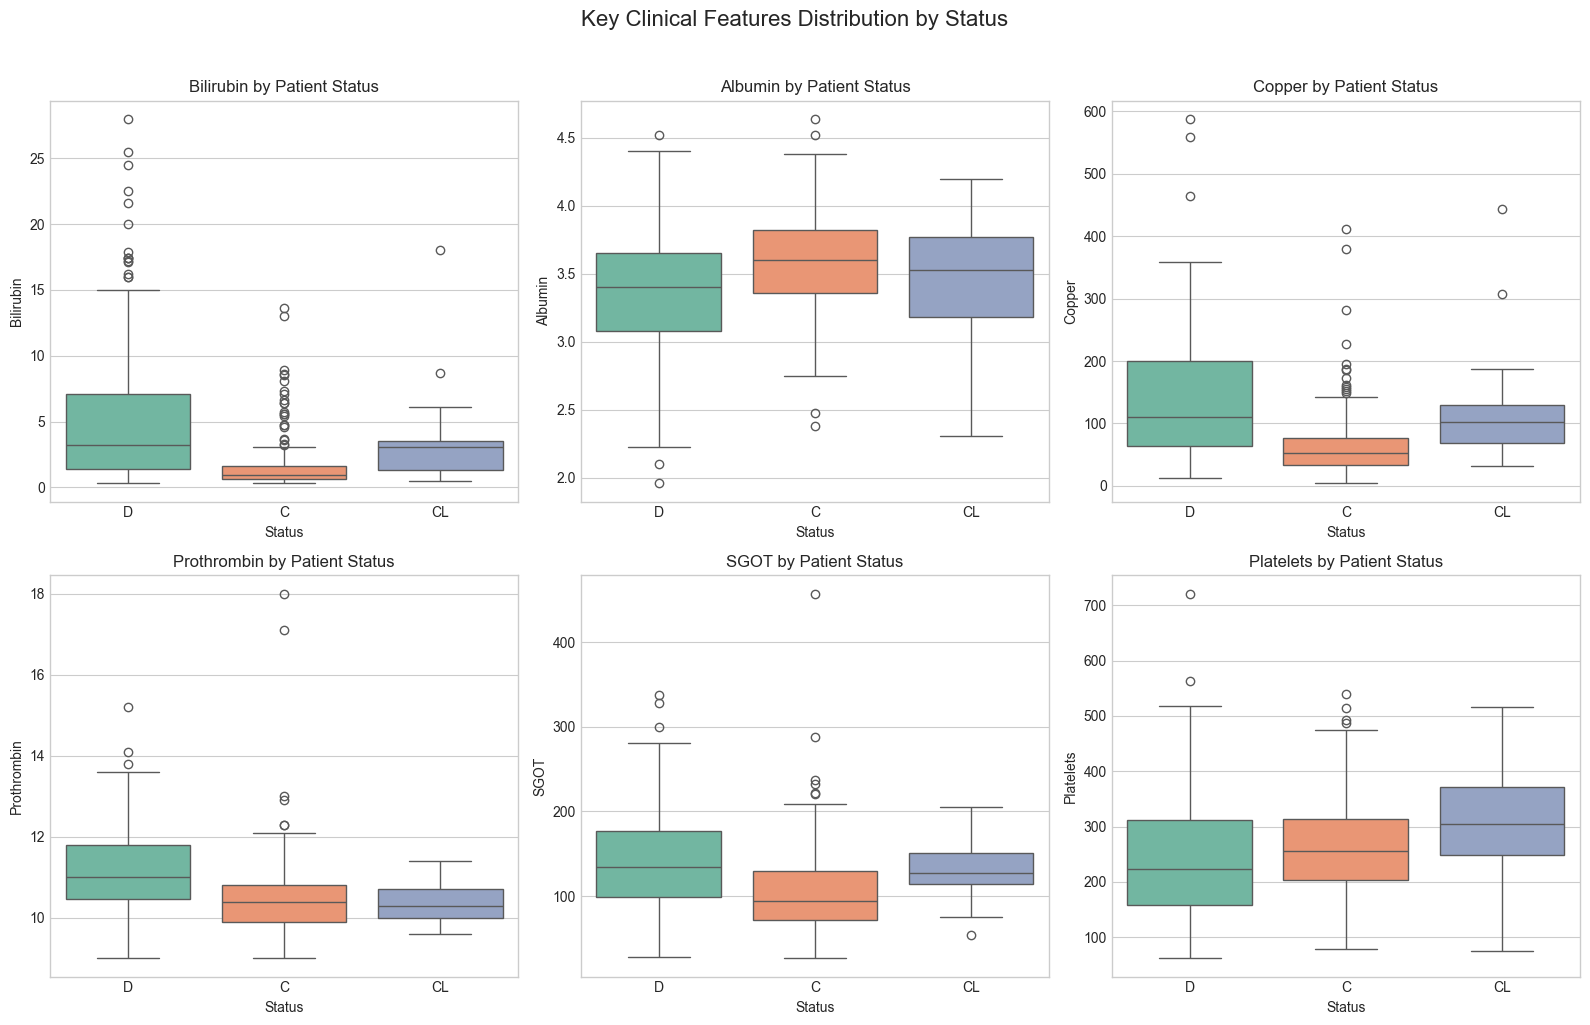

In [14]:
# Key features distribution by Status
key_features = ['Bilirubin', 'Albumin', 'Copper', 'Prothrombin', 'SGOT', 'Platelets']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    sns.boxplot(data=df, x='Status', y=col, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col} by Patient Status', fontsize=12)

plt.suptitle('Key Clinical Features Distribution by Status', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 10. Drug Treatment Analysis

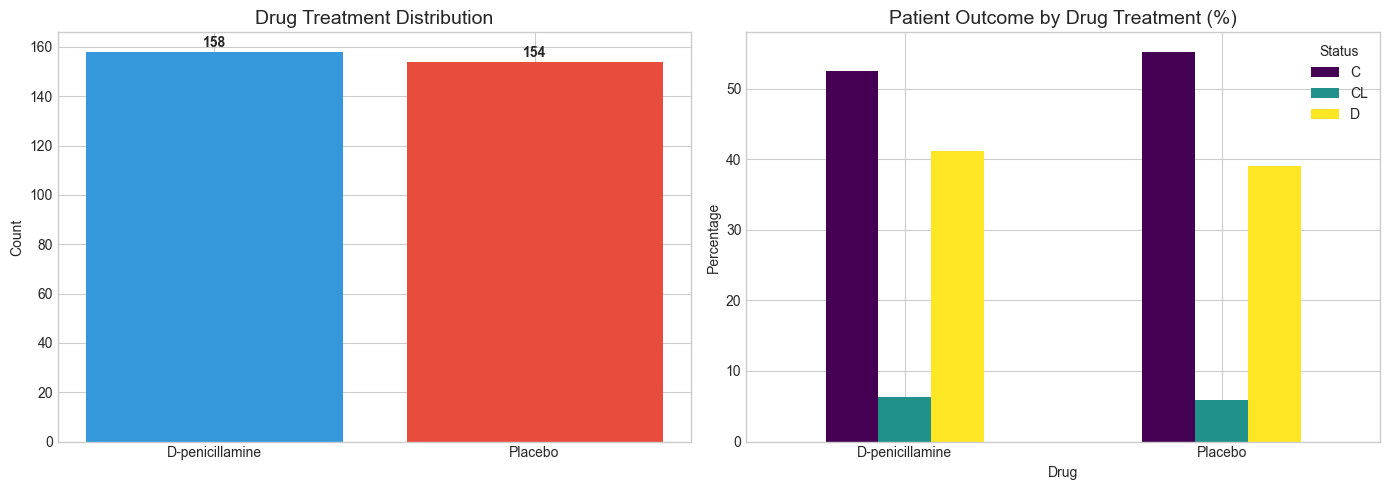


DRUG vs STATUS CROSSTAB
Status             C  CL    D  All
Drug                              
D-penicillamine   83  10   65  158
Placebo           85   9   60  154
All              168  19  125  312


In [15]:
# Drug treatment vs Status analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Drug distribution
drug_counts = df['Drug'].value_counts()
axes[0].bar(drug_counts.index, drug_counts.values, color=['#3498db', '#e74c3c'])
axes[0].set_title('Drug Treatment Distribution', fontsize=14)
axes[0].set_ylabel('Count')
for i, v in enumerate(drug_counts.values):
    axes[0].text(i, v + 2, str(v), ha='center', fontweight='bold')

# Drug vs Status crosstab
drug_status = pd.crosstab(df['Drug'], df['Status'], normalize='index') * 100
drug_status.plot(kind='bar', ax=axes[1], colormap='viridis')
axes[1].set_title('Patient Outcome by Drug Treatment (%)', fontsize=14)
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Status')

plt.tight_layout()
plt.show()

# Chi-square test
print("\n" + "=" * 50)
print("DRUG vs STATUS CROSSTAB")
print("=" * 50)
print(pd.crosstab(df['Drug'], df['Status'], margins=True))

## 11. Age and Gender Analysis

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\3692315887.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Age_Years', ax=axes[1, 0], palette='Set2')


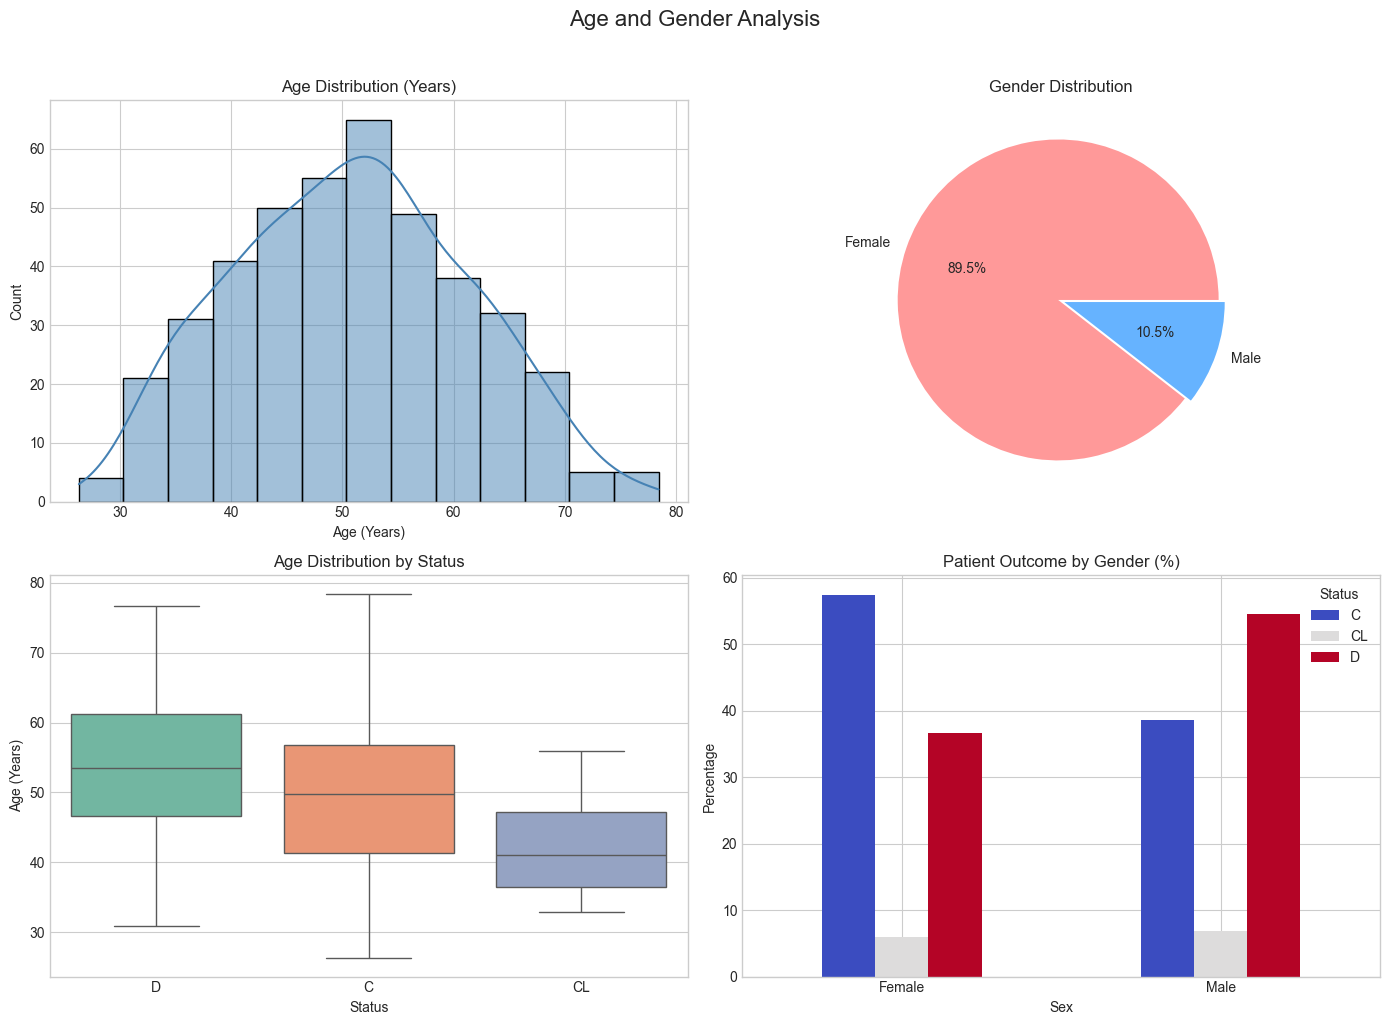


Age Statistics (Years):
Mean Age: 50.7 years
Median Age: 51.0 years
Age Range: 26.3 - 78.4 years


In [16]:
# Convert Age from days to years
df['Age_Years'] = df['Age'] / 365.25

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
sns.histplot(df['Age_Years'], kde=True, ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Age Distribution (Years)', fontsize=12)
axes[0, 0].set_xlabel('Age (Years)')

# Gender distribution
gender_counts = df['Sex'].value_counts()
axes[0, 1].pie(gender_counts.values, labels=['Female', 'Male'], autopct='%1.1f%%',
               colors=['#ff9999', '#66b3ff'], explode=[0.02, 0.02])
axes[0, 1].set_title('Gender Distribution', fontsize=12)

# Age by Status
sns.boxplot(data=df, x='Status', y='Age_Years', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Age Distribution by Status', fontsize=12)
axes[1, 0].set_ylabel('Age (Years)')

# Gender vs Status
gender_status = pd.crosstab(df['Sex'], df['Status'], normalize='index') * 100
gender_status.plot(kind='bar', ax=axes[1, 1], colormap='coolwarm')
axes[1, 1].set_title('Patient Outcome by Gender (%)', fontsize=12)
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1, 1].legend(title='Status')

plt.suptitle('Age and Gender Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print(f"\nAge Statistics (Years):")
print(f"Mean Age: {df['Age_Years'].mean():.1f} years")
print(f"Median Age: {df['Age_Years'].median():.1f} years")
print(f"Age Range: {df['Age_Years'].min():.1f} - {df['Age_Years'].max():.1f} years")

## 12. Stage Analysis

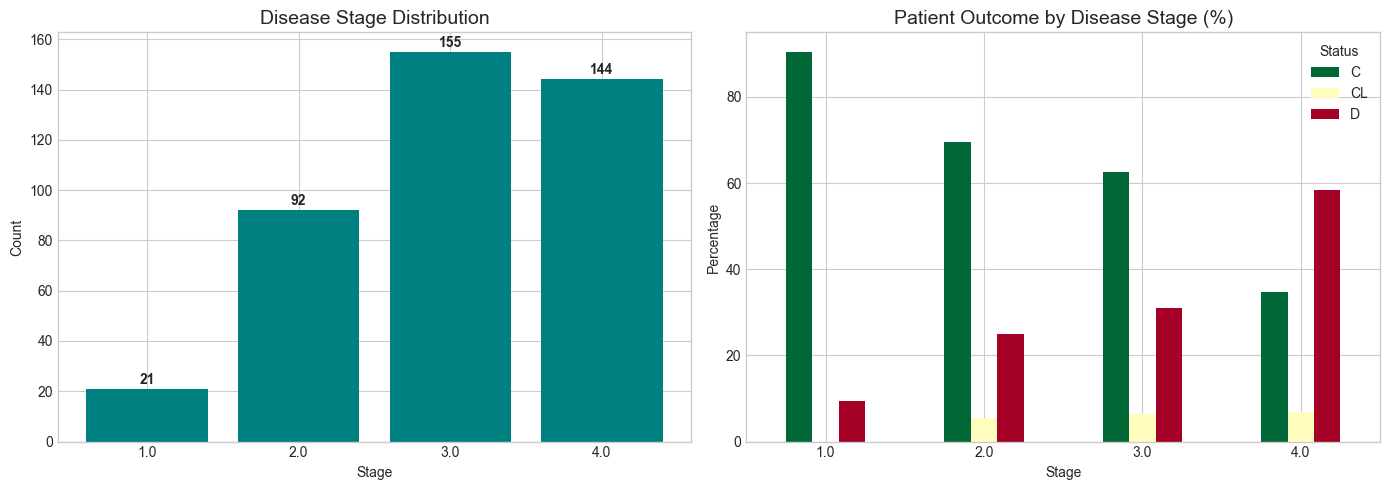


Stage vs Status Crosstab:
Status    C  CL    D  All
Stage                    
1.0      19   0    2   21
2.0      64   5   23   92
3.0      97  10   48  155
4.0      50  10   84  144
All     230  25  157  412


In [17]:
# Disease Stage Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stage distribution
stage_counts = df['Stage'].value_counts().sort_index()
axes[0].bar(stage_counts.index.astype(str), stage_counts.values, color='teal')
axes[0].set_title('Disease Stage Distribution', fontsize=14)
axes[0].set_xlabel('Stage')
axes[0].set_ylabel('Count')
for i, v in enumerate(stage_counts.values):
    axes[0].text(i, v + 2, str(v), ha='center', fontweight='bold')

# Stage vs Status
stage_status = pd.crosstab(df['Stage'], df['Status'], normalize='index') * 100
stage_status.plot(kind='bar', ax=axes[1], colormap='RdYlGn_r')
axes[1].set_title('Patient Outcome by Disease Stage (%)', fontsize=14)
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Status')

plt.tight_layout()
plt.show()

print("\nStage vs Status Crosstab:")
print(pd.crosstab(df['Stage'], df['Status'], margins=True))

## 13. Pairplot for Key Features

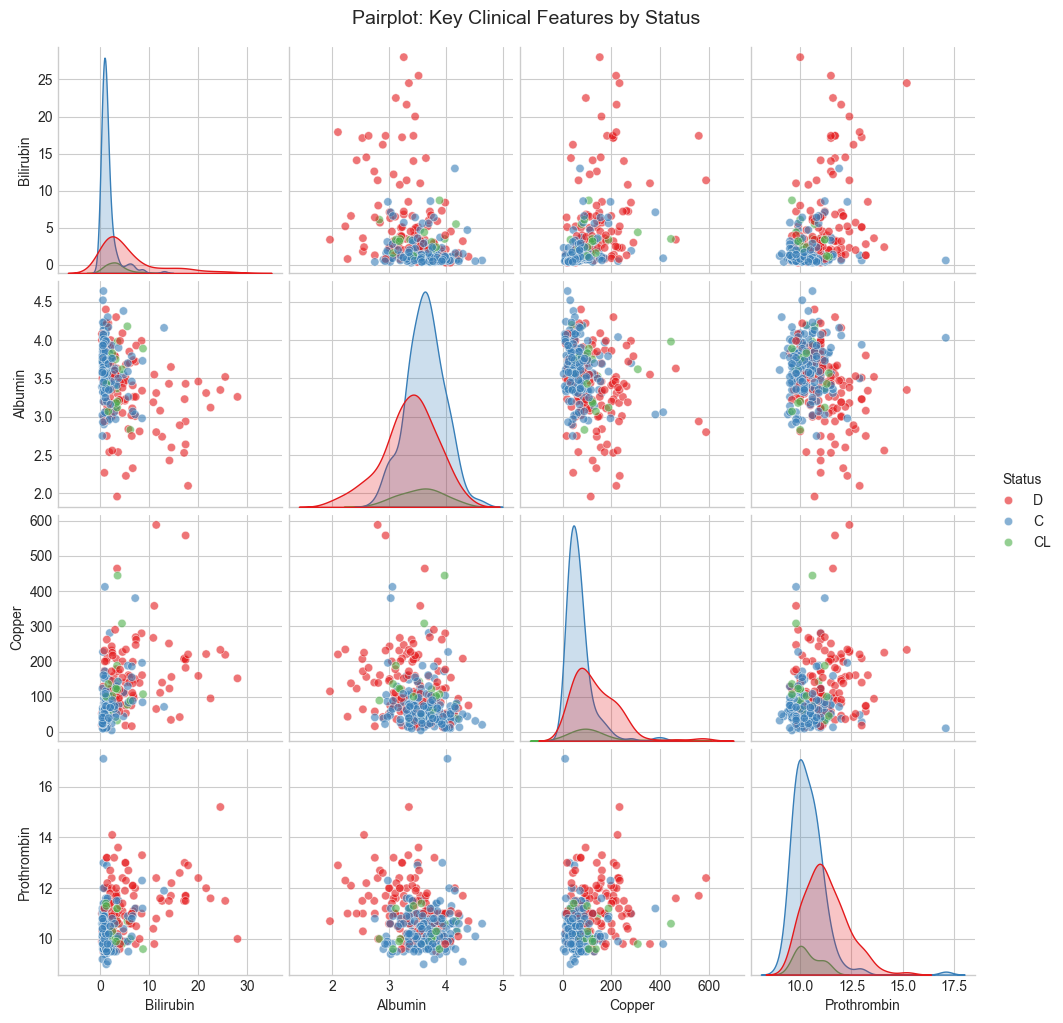

In [18]:
# Pairplot for key clinical features
key_cols = ['Bilirubin', 'Albumin', 'Copper', 'Prothrombin', 'Status']
pairplot_df = df[key_cols].dropna()

sns.pairplot(pairplot_df, hue='Status', palette='Set1', diag_kind='kde', 
             plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairplot: Key Clinical Features by Status', y=1.02, fontsize=14)
plt.show()

## 14. Summary Statistics

In [19]:
# EDA Summary
print("=" * 60)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("=" * 60)

print(f"\n📊 Dataset Overview:")
print(f"   - Total Patients: {len(df)}")
print(f"   - Total Features: {df.shape[1]}")
print(f"   - Numerical Features: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical Features: {len(df.select_dtypes(include=['object']).columns)}")

print(f"\n🎯 Target Variable (Status):")
for status, count in df['Status'].value_counts().items():
    print(f"   - {status}: {count} ({count/len(df)*100:.1f}%)")

print(f"\n❌ Missing Values:")
missing_total = df.isnull().sum().sum()
print(f"   - Total Missing: {missing_total}")
print(f"   - Columns with Missing: {(df.isnull().sum() > 0).sum()}")

print(f"\n👥 Demographics:")
print(f"   - Mean Age: {df['Age_Years'].mean():.1f} years")
print(f"   - Female: {(df['Sex']=='F').sum()} ({(df['Sex']=='F').mean()*100:.1f}%)")
print(f"   - Male: {(df['Sex']=='M').sum()} ({(df['Sex']=='M').mean()*100:.1f}%)")

print(f"\n💊 Drug Treatment:")
for drug, count in df['Drug'].value_counts().items():
    print(f"   - {drug}: {count} ({count/len(df)*100:.1f}%)")

print(f"\n📈 Disease Stage Distribution:")
for stage, count in df['Stage'].value_counts().sort_index().items():
    print(f"   - Stage {int(stage) if pd.notna(stage) else 'NA'}: {count}")

EXPLORATORY DATA ANALYSIS SUMMARY

📊 Dataset Overview:
   - Total Patients: 418
   - Total Features: 21
   - Numerical Features: 14
   - Categorical Features: 7

🎯 Target Variable (Status):
   - C: 232 (55.5%)
   - D: 161 (38.5%)
   - CL: 25 (6.0%)

❌ Missing Values:
   - Total Missing: 1033
   - Columns with Missing: 12

👥 Demographics:
   - Mean Age: 50.7 years
   - Female: 374 (89.5%)
   - Male: 44 (10.5%)

💊 Drug Treatment:
   - D-penicillamine: 158 (37.8%)
   - Placebo: 154 (36.8%)

📈 Disease Stage Distribution:
   - Stage 1: 21
   - Stage 2: 92
   - Stage 3: 155
   - Stage 4: 144
